In [72]:
# Keras-Vis
# vis.visualization:
# https://github.com/raghakot/keras-vis

In [73]:
import os
import os.path

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing.image import img_to_array
from keras.models   import load_model
from vis.visualization import visualize_saliency
from vis.visualization import visualize_cam
from vis.utils import utils

In [74]:
def plot_heatmap(heatmap, caption, fn):
    fig, ax = plt.subplots(1)
    #ax.text(5, 5, caption, bbox=dict(facecolor='red', alpha=0.5))
    ax.imshow(heatmap, interpolation='nearest')
    plt.title(caption)
    plt.show()
    plt.savefig(fn, bbox_inches='tight')

def get_pap_label(idx_of_class, z_class_map):
    return z_class_map[idx_of_class]['short_name']


In [75]:
def generate_heatmaps(model, layer_name, image_path, image_width, image_height, salience_fn, attention_fn):
    '''
    layer_name: The name of the layer we want to visualize. Example: 'predictions'
    See model definition in vggnet.py)
    '''

    seed_img = utils.load_img(image_path, target_size=(image_width, image_height))
    pred_class_idx = np.argmax(model.predict(np.array([img_to_array(seed_img)])))
    predicted_class = get_pap_label(pred_class_idx, z_class_map)

    layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

    saliency_caption = salience_fn
    saliency_heatmap = visualize_saliency(model, layer_idx, [pred_class_idx], seed_img)
    plot_heatmap(saliency_heatmap, saliency_caption, salience_fn)

    cam_caption = attention_fn
    cam_heatmap = visualize_cam(model, layer_idx, [pred_class_idx], seed_img)
    plot_heatmap(cam_heatmap, cam_caption, attention_fn)


In [76]:
z_class_map = { 0: {"cell_type_id": 4506, "description": "Actinomyces Spp.", "short_name": "actinomyces"},
                1: {"cell_type_id": 4220, "description": "ASC-H", "short_name": "asc_h"},
                2: {"cell_type_id": 4210, "description": "ASC-US", "short_name": "asc_us"},
                3: {"cell_type_id": 4514, "description": "Candida", "short_name": "candida"},
                4: {"cell_type_id": 4380, "description": "Carcinoma", "short_name": "carcinoma"},
                5: {"cell_type_id": 4340, "description": "HSIL", "short_name": "hsil"},
                6: {"cell_type_id": 4300, "description": "LSIL", "short_name": "lsil"},
                7: {"cell_type_id": 4900, "description": "Pap Unknown", "short_name": "none"},
                8: {"cell_type_id": 4503, "description": "Trichomonas Vaginalis", "short_name": "trichomonas"}}

In [77]:
image_width = 224
image_height = 224

model_fn = '/home/mike/gitlab2/techcyte/python-dl/pap/apps/pap_deployed/pap_9c_m1.h5'
model = load_model(model_fn)
layer_name = 'predictions'

lsil_train_root = '/home/mike/datasets/PapAngelica/out_0515_224_9/train/train_main/lsil'
x_lsil_snippets = ['926_21521_34124_21611_34218_native.jpg', 
                   '927_16059_31055_16204_31216_native.jpg', 
                   '927_16207_31049_16420_31239_native.jpg', 
                   '929_13579_25693_13698_25794_native.jpg', 
                   '930_37908_9666_38079_9864_native.jpg', 
                   '931_42450_22533_42535_22624_native.jpg', 
                   '932_13302_7941_13489_8162_native.jpg', 
                   '933_28322_25017_28502_25226_native.jpg', 
                   '934_39143_33431_39308_33573_native.jpg', 
                   '935_47752_30049_47932_30185_native.jpg', 
                   '936_31814_27519_32013_27660_native.jpg', 
                   '938_44693_11073_44796_11195_native.jpg', 
                   '940_5377_34511_5591_34667_native.jpg', 
                   '946_7404_27044_7589_27207_native.jpg', 
                   '947_41250_15177_41371_15284_native.jpg', 
                   '966_12316_29845_12490_29963_native.jpg', 
                   '970_41039_23603_41259_23804_native.jpg', 
                   '971_46474_19736_46610_19815_native.jpg', 
                   '973_13330_34799_13516_34953_native.jpg', 
                   '974_11375_32451_11565_32635_native.jpg', 
                   '980_35885_37183_35996_37265_native.jpg', 
                   '999_7436_22595_7527_22670_native.jpg'] 


x_lsil_snippets_2 = ['926_21521_34124_21611_34218_native.jpg', '927_16059_31055_16204_31216_native.jpg']



Working on filters: [6]


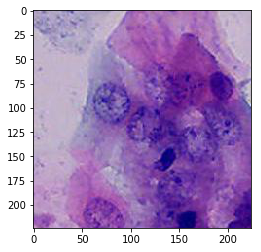

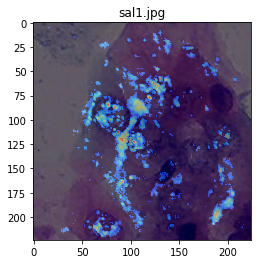

Working on filters: [6]


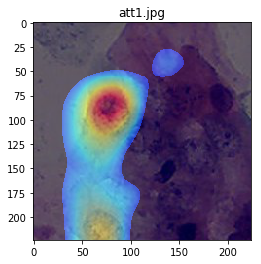

Working on filters: [6]


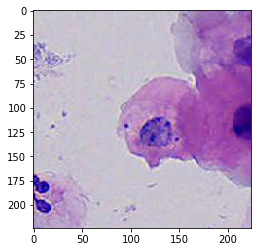

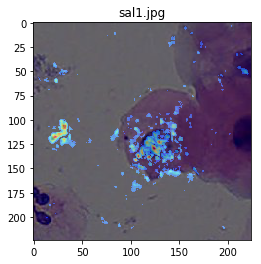

Working on filters: [6]


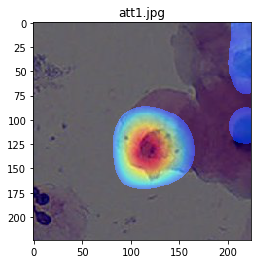

In [78]:
for name in x_lsil_snippets_2:
    image_path = os.path.join(lsil_train_root, name)
    img=mpimg.imread(image_path)
    plt.imshow(img)
    generate_heatmaps(model, layer_name, image_path, image_width, image_height, 'sal1.jpg', 'att1.jpg')
